In [1]:
!unzip ./archive\ \(66\).zip

Archive:  ./archive (66).zip
  inflating: Youtube Video Dataset.csv  


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('./Youtube Video Dataset.csv')

In [4]:
data.head()

,Title,Videourl,Category,Description
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,Food,This is the ultimate must-try food bucket list...
2,Gordon Ramsay’s Top 5 Indian Dishes,/watch?v=upfu5nQB2ks,Food,We found 5 of the best and most interesting In...
3,How To Use Chopsticks - In About A Minute 🍜,/watch?v=xFRzzSF_6gk,Food,You're most likely sitting in a restaurant wit...
4,Trying Indian Food 1st Time!,/watch?v=K79bXtaRwcM,Food,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...


In [5]:
data.dropna(inplace=True)

In [6]:
len(data)

11128

In [11]:
data.drop(['Videourl','Description'],axis=1,inplace=True)

In [12]:
import json
def object_to_int(data,coloum):
    info_dict = {}
    all_info = []
    index = -1
    for info in data[coloum]:
        if info not in info_dict:
            index = index + 1
            info_dict[info] = index
    for info in data[coloum]:
        all_info.append(info_dict[info])
    with open(f'{coloum}.json','w') as json_file:
        json.dump(info_dict,json_file)
    return all_info,info_dict

In [14]:
data['Category'] = object_to_int(data,'Category')[0]

In [15]:
data

,Title,Category
0,Madagascar Street Food!!! Super RARE Malagasy ...,0
1,42 Foods You Need To Eat Before You Die,0
2,Gordon Ramsay’s Top 5 Indian Dishes,0
3,How To Use Chopsticks - In About A Minute 🍜,0
4,Trying Indian Food 1st Time!,0
...,...,...
11206,"art journal | shimmer sprays, stencils, collag...",5
11207,Ar-Tea Collage * Mixed Media Art,5
11208,DIY Mixed Media Art Collage Greeting Cards / M...,5
11209,Art Collage Process DecoJournal using Rice Pap...,5


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
import pickle
import os

In [20]:

def fit_and_calcuate_metrixs(models:dict,X_train,X_test,y_train,y_test):
    models_info = {}
    for name,model in models.items():
        print(name)
        model = model.fit(X_train,y_train)
        y_preds = model.predict(X_test)
        try:
            info = {
                'Accuracy':model.score(X_test,y_test),
                'F1 Score':f1_score(y_test,y_preds,average='macro'),
                'Precision':precision_score(y_test,y_preds,average='macro'),
                'Recall':recall_score(y_test,y_preds,average='macro')
            }
            plot_confusion_matrix(model,X_test,y_test)
        except:
            info = {'Accuracy':model.score(X_test,y_test)}
        models_info[name] = info
        print('\n\n')
    return models_info
def calcuate_metrixs(models:dict,X_train,X_test,y_train,y_test):
    models_info = {}
    for name,model in models.items():
        print(name)
        y_preds = model.predict(X_test)
        info = {
            'Accuracy':model.score(X_test,y_test),
            'F1 Score':f1_score(y_test,y_preds,average='macro'),
            'Precision':precision_score(y_test,y_preds,average='macro'),
            'Recall':recall_score(y_test,y_preds,average='macro')
        }
        plot_confusion_matrix(model,X_test,y_test)
        plot_roc_curve(model,X_test,y_test)
        models_info[name] = info
        print('\n\n')
    return models_info

RandomForestClassifier



DecisionTreeClassifier





<AxesSubplot:>

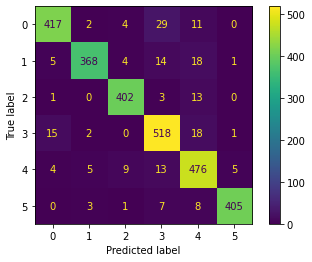

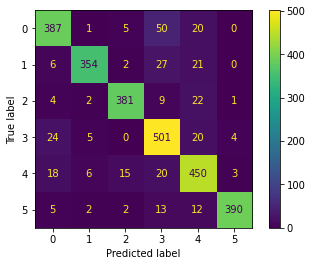

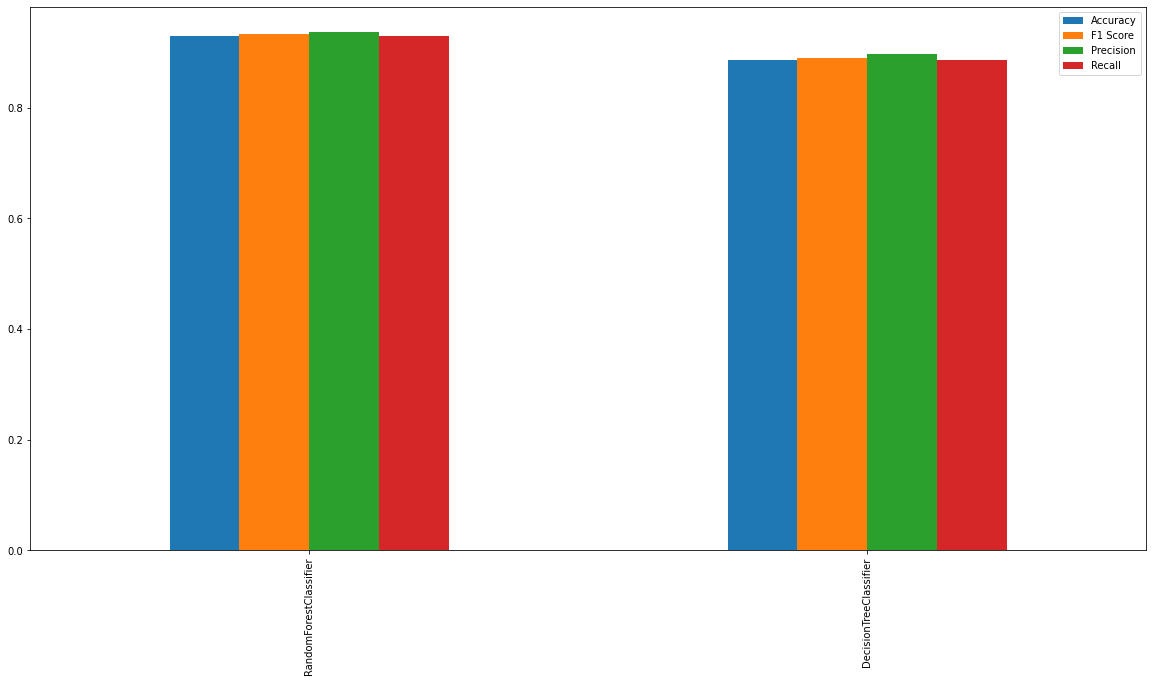

In [22]:
X = data['Title']
y = data['Category']
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
cv.fit(X)
X = cv.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
models = {
    'RandomForestClassifier':RandomForestClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
}
models_clf_results = fit_and_calcuate_metrixs(models,X_train,X_test,y_train,y_test)
models_clf_results = pd.DataFrame(models_clf_results.values(),models_clf_results.keys())
models_clf_results.plot.bar(figsize=(20,10))

In [23]:
models_clf_results

,Accuracy,F1 Score,Precision,Recall
RandomForestClassifier,0.929547,0.932043,0.935666,0.929588
DecisionTreeClassifier,0.885334,0.889946,0.897129,0.885271


In [24]:
model = RandomForestClassifier().fit(X_train,y_train)

In [25]:
import pickle
pickle.dump(model,open('./model.pkl','wb'))

In [26]:
!ls

'archive (66).zip'   main.ipynb  'Youtube Video Dataset.csv'
 Category.json	     model.pkl
